# Trader Analysis Across 10 Coins (Batch 578)

**Objective**: Deep dive into trader behavior patterns across all 10 coins in batch 578

**Key Questions**:
- Who are the traders? Unique individuals or bots?
- Do traders stick to one coin or jump between multiple coins?
- Can we identify whales vs retail traders?
- What are the trading patterns and behaviors?
- Are there sophisticated traders exploiting multiple coins?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

# Constants
SOL_MINT = 'So11111111111111111111111111111111111111112'
DATA_PATH = Path('../data/solana/first_day_trades/first_day_trades_batch_578.csv')

print("Loading batch 578 data for trader analysis...")
df = pd.read_csv(DATA_PATH)
df['block_timestamp'] = pd.to_datetime(df['block_timestamp'])

# Recreate coin mapping from notebook 01
unique_mints = df['mint'].unique()
coin_names = {mint: f"Coin_{i}" for i, mint in enumerate(unique_mints, 1)}
df['coin_name'] = df['mint'].map(coin_names)

print(f"Data loaded: {len(df):,} transactions across {len(unique_mints)} coins")
print(f"Unique traders: {df['swapper'].nunique():,}")
print(f"Time range: {df['block_timestamp'].min()} to {df['block_timestamp'].max()}")


Loading batch 578 data for trader analysis...
Data loaded: 1,030,491 transactions across 10 coins
Unique traders: 24,478
Time range: 2024-03-18 02:16:52+00:00 to 2025-06-11 23:59:59+00:00


=== BASIC TRADER STATISTICS ===
Total unique traders: 24,478
Average transactions per trader: 42.1

=== TRADER ACTIVITY DISTRIBUTION ===
Most active trader: 5472 transactions
Median transactions per trader: 2
Traders with only 1 transaction: 3,613 (14.8%)
Traders with >100 transactions: 965 (3.9%)
Traders with >1000 transactions: 170


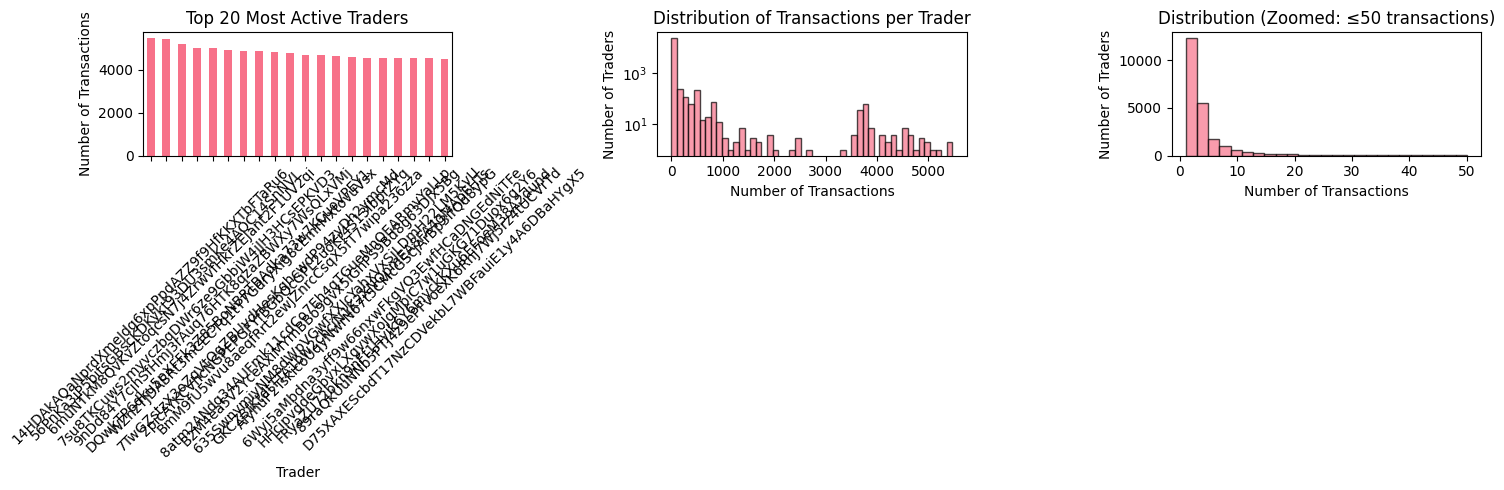

In [2]:
# Basic trader statistics
print("=== BASIC TRADER STATISTICS ===")

total_traders = df['swapper'].nunique()
total_transactions = len(df)
avg_txns_per_trader = total_transactions / total_traders

print(f"Total unique traders: {total_traders:,}")
print(f"Average transactions per trader: {avg_txns_per_trader:.1f}")

# Trader activity distribution
trader_txn_counts = df['swapper'].value_counts()
print(f"\n=== TRADER ACTIVITY DISTRIBUTION ===")
print(f"Most active trader: {trader_txn_counts.iloc[0]} transactions")
print(f"Median transactions per trader: {trader_txn_counts.median():.0f}")
print(f"Traders with only 1 transaction: {(trader_txn_counts == 1).sum():,} ({(trader_txn_counts == 1).mean():.1%})")
print(f"Traders with >100 transactions: {(trader_txn_counts > 100).sum():,} ({(trader_txn_counts > 100).mean():.1%})")
print(f"Traders with >1000 transactions: {(trader_txn_counts > 1000).sum():,}")

# Plot trader activity distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
trader_txn_counts.head(20).plot(kind='bar')
plt.title('Top 20 Most Active Traders')
plt.xlabel('Trader')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.hist(trader_txn_counts, bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Transactions per Trader')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Traders')
plt.yscale('log')

plt.subplot(1, 3, 3)
plt.hist(trader_txn_counts[trader_txn_counts <= 50], bins=25, alpha=0.7, edgecolor='black')
plt.title('Distribution (Zoomed: ≤50 transactions)')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Traders')

plt.tight_layout()
plt.show()


=== MULTI-COIN TRADER ANALYSIS ===
Traders who traded multiple coins: 26
Percentage of multi-coin traders: 0.1%

=== COINS PER TRADER DISTRIBUTION ===
Traded 1 coin(s): 24,452 traders (99.9%)
Traded 2 coin(s): 16 traders (0.1%)
Traded 3 coin(s): 9 traders (0.0%)
Traded 5 coin(s): 1 traders (0.0%)

=== TOP MULTI-COIN TRADERS ===
                                             trader  coins_traded
24167   kiwiC4pg5mC4N5AhpXc4Av3V6oV7Sn2p3CqB7NeHbJJ             5
1421   2MFoS3MPtvyQ4Wh4M9pdfPjz6UhVoNbFbGJAskCPCj3h             3
7013   6LXutJvKUw8Q5ue2gCgKHQdAN4suWW8awzFVC6XCguFx             3
20275  FundHfY8oo8J9KYGyfXFFuQCHe7Z1VBNmsj84eMcdYs4             3
15685  CapuXNQoDviLvU1PxFiizLgPNQCxrsag1uMeyk6zLVps             3
11860  9nnLbotNTcUhvbrsA6Mdkx45Sm82G35zo28AqUvjExn8             3
7191   6U91aKa8pmMxkJwBCfPTmUEfZi6dHe7DcFq2ALvB2tbB             3
14074  BQ72nSv9f3PRyRKCBnHLVrerrv37CYTHm5h3s9VSGQDV             3
5097   4xDsmeTWPNjgSVSS1VTfzFq3iHZhp77ffPkAmkZkdu71             3
24255   pr

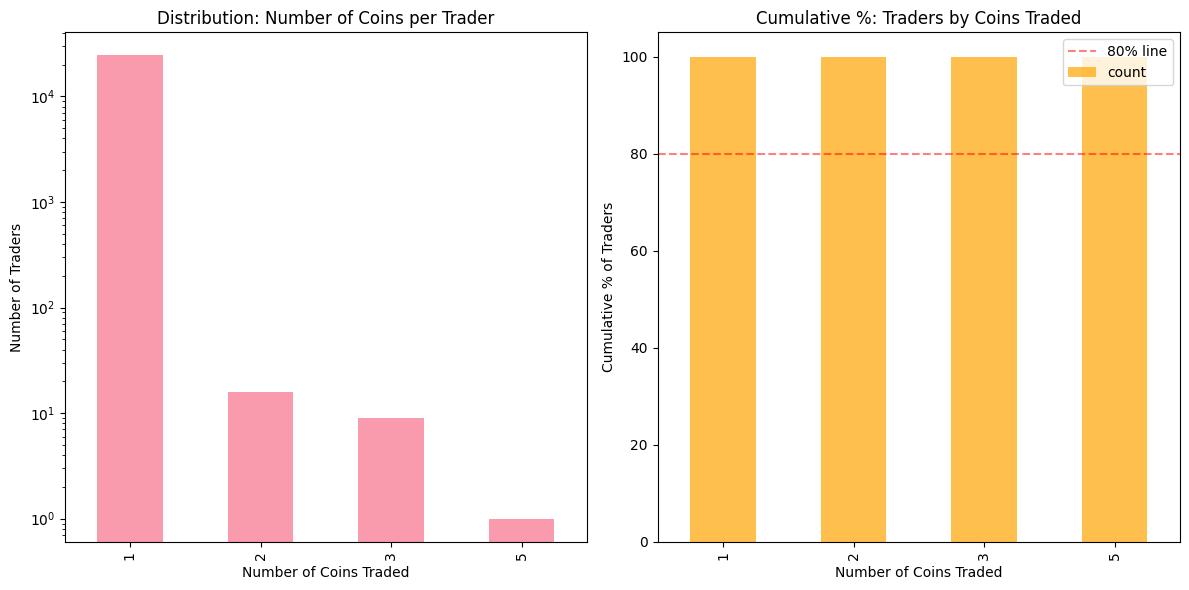

In [3]:
# Multi-coin trader analysis
print("=== MULTI-COIN TRADER ANALYSIS ===")

# Count how many coins each trader touched
trader_coin_counts = df.groupby('swapper')['coin_name'].nunique().reset_index()
trader_coin_counts.columns = ['trader', 'coins_traded']

print(f"Traders who traded multiple coins: {(trader_coin_counts['coins_traded'] > 1).sum():,}")
print(f"Percentage of multi-coin traders: {(trader_coin_counts['coins_traded'] > 1).mean():.1%}")

# Distribution of coins per trader
coin_dist = trader_coin_counts['coins_traded'].value_counts().sort_index()
print(f"\n=== COINS PER TRADER DISTRIBUTION ===")
for coins, count in coin_dist.items():
    print(f"Traded {coins} coin(s): {count:,} traders ({count/len(trader_coin_counts):.1%})")

# Identify the most sophisticated traders (those who traded many coins)
multi_coin_traders = trader_coin_counts[trader_coin_counts['coins_traded'] > 1].sort_values('coins_traded', ascending=False)
print(f"\n=== TOP MULTI-COIN TRADERS ===")
print(multi_coin_traders.head(10))

# Analysis of traders who touched all or most coins
max_coins = trader_coin_counts['coins_traded'].max()
super_traders = trader_coin_counts[trader_coin_counts['coins_traded'] >= max_coins - 1]
print(f"\n=== SUPER TRADERS (traded {max_coins-1}+ coins) ===")
print(f"Number of super traders: {len(super_traders)}")
if len(super_traders) > 0:
    print("Super trader details:")
    for _, row in super_traders.iterrows():
        trader = row['trader']
        coins = row['coins_traded']
        total_txns = (df['swapper'] == trader).sum()
        print(f"  {trader}: {coins} coins, {total_txns} total transactions")

# Visualize multi-coin trading
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
coin_dist.plot(kind='bar', alpha=0.7)
plt.title('Distribution: Number of Coins per Trader')
plt.xlabel('Number of Coins Traded')
plt.ylabel('Number of Traders')
plt.yscale('log')

plt.subplot(1, 2, 2)
# Show cumulative percentage
cumulative_pct = (coin_dist.cumsum() / coin_dist.sum() * 100)
cumulative_pct.plot(kind='bar', alpha=0.7, color='orange')
plt.title('Cumulative %: Traders by Coins Traded')
plt.xlabel('Number of Coins Traded')
plt.ylabel('Cumulative % of Traders')
plt.axhline(y=80, color='red', linestyle='--', alpha=0.5, label='80% line')
plt.legend()

plt.tight_layout()
plt.show()


=== WHALE VS RETAIL ANALYSIS ===
=== TRANSACTION TYPE DISTRIBUTION ===
Small: 724,004 transactions (70.3%)
Medium: 300,713 transactions (29.2%)
Big: 5,629 transactions (0.5%)
Whale: 145 transactions (0.0%)

=== SOL VOLUME BY TRADER TYPE ===
Big: 110,631 SOL (7.5%)
Medium: 1,077,414 SOL (72.6%)
Small: 270,166 SOL (18.2%)
Whale: 25,277 SOL (1.7%)

=== UNIQUE TRADERS BY CATEGORY (based on max transaction) ===
Small: 13,708 traders (56.0%)
Medium: 8,152 traders (33.3%)
Big: 2,538 traders (10.4%)
Whale: 80 traders (0.3%)


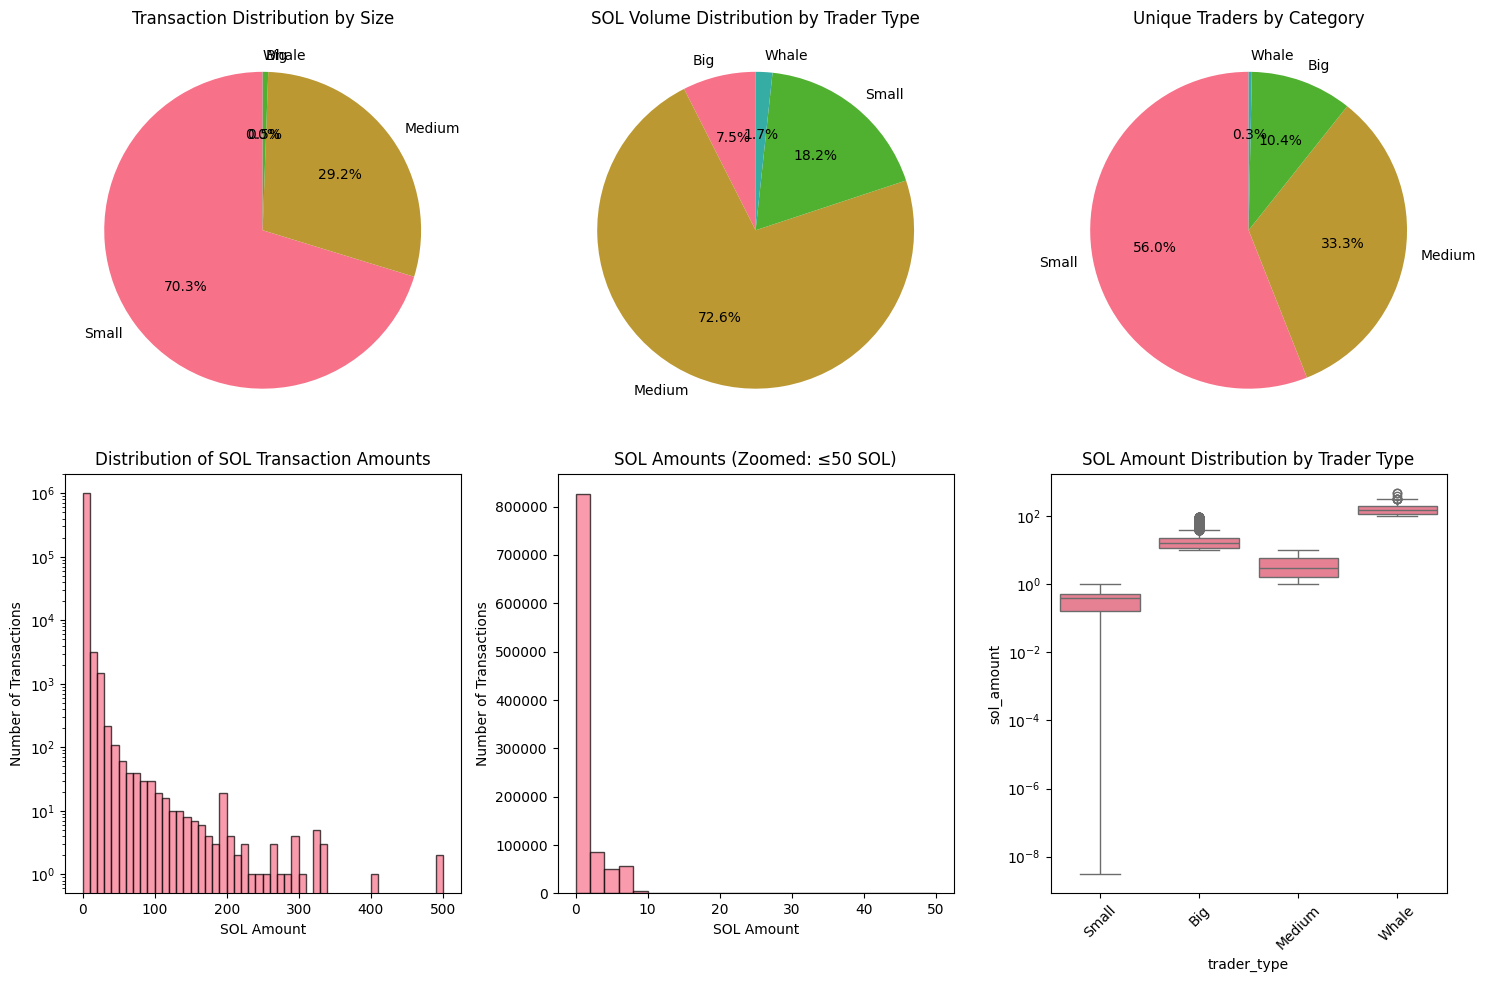

In [4]:
# Whale vs Retail Analysis
print("=== WHALE VS RETAIL ANALYSIS ===")

# Calculate SOL amounts per transaction for analysis
# Create buy/sell indicators and SOL amounts
df['is_buy'] = df['mint'] == df['swap_to_mint']
df['is_sell'] = df['mint'] == df['swap_from_mint']

# Get SOL amounts
df['sol_amount'] = 0.0
buy_mask = df['is_buy'] & (df['swap_from_mint'] == SOL_MINT)
sell_mask = df['is_sell'] & (df['swap_to_mint'] == SOL_MINT)

df.loc[buy_mask, 'sol_amount'] = df.loc[buy_mask, 'swap_from_amount']
df.loc[sell_mask, 'sol_amount'] = df.loc[sell_mask, 'swap_to_amount']

# Define whale thresholds (based on SOL amounts)
WHALE_THRESHOLD_SOL = 100  # 100+ SOL per transaction = whale
BIG_TRADER_THRESHOLD_SOL = 10  # 10+ SOL = big trader
RETAIL_THRESHOLD_SOL = 1  # <1 SOL = small retail

# Classify transactions
df['trader_type'] = 'Unknown'
df.loc[df['sol_amount'] >= WHALE_THRESHOLD_SOL, 'trader_type'] = 'Whale'
df.loc[(df['sol_amount'] >= BIG_TRADER_THRESHOLD_SOL) & (df['sol_amount'] < WHALE_THRESHOLD_SOL), 'trader_type'] = 'Big'
df.loc[(df['sol_amount'] >= RETAIL_THRESHOLD_SOL) & (df['sol_amount'] < BIG_TRADER_THRESHOLD_SOL), 'trader_type'] = 'Medium'
df.loc[(df['sol_amount'] > 0) & (df['sol_amount'] < RETAIL_THRESHOLD_SOL), 'trader_type'] = 'Small'

# Transaction type distribution
txn_type_dist = df['trader_type'].value_counts()
print("=== TRANSACTION TYPE DISTRIBUTION ===")
for trader_type, count in txn_type_dist.items():
    pct = count / len(df) * 100
    print(f"{trader_type}: {count:,} transactions ({pct:.1f}%)")

# SOL volume by trader type
sol_volume_by_type = df.groupby('trader_type')['sol_amount'].sum()
print(f"\n=== SOL VOLUME BY TRADER TYPE ===")
total_sol_volume = sol_volume_by_type.sum()
for trader_type, volume in sol_volume_by_type.items():
    pct = volume / total_sol_volume * 100 if total_sol_volume > 0 else 0
    print(f"{trader_type}: {volume:,.0f} SOL ({pct:.1f}%)")

# Identify traders by their largest transaction
trader_max_txn = df.groupby('swapper')['sol_amount'].max().reset_index()
trader_max_txn['trader_category'] = 'Unknown'
trader_max_txn.loc[trader_max_txn['sol_amount'] >= WHALE_THRESHOLD_SOL, 'trader_category'] = 'Whale'
trader_max_txn.loc[(trader_max_txn['sol_amount'] >= BIG_TRADER_THRESHOLD_SOL) & (trader_max_txn['sol_amount'] < WHALE_THRESHOLD_SOL), 'trader_category'] = 'Big'
trader_max_txn.loc[(trader_max_txn['sol_amount'] >= RETAIL_THRESHOLD_SOL) & (trader_max_txn['sol_amount'] < BIG_TRADER_THRESHOLD_SOL), 'trader_category'] = 'Medium'
trader_max_txn.loc[(trader_max_txn['sol_amount'] > 0) & (trader_max_txn['sol_amount'] < RETAIL_THRESHOLD_SOL), 'trader_category'] = 'Small'

trader_category_dist = trader_max_txn['trader_category'].value_counts()
print(f"\n=== UNIQUE TRADERS BY CATEGORY (based on max transaction) ===")
for category, count in trader_category_dist.items():
    pct = count / len(trader_max_txn) * 100
    print(f"{category}: {count:,} traders ({pct:.1f}%)")

# Visualize whale analysis
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
txn_type_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Transaction Distribution by Size')
plt.ylabel('')

plt.subplot(2, 3, 2)
sol_volume_by_type.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('SOL Volume Distribution by Trader Type')
plt.ylabel('')

plt.subplot(2, 3, 3)
trader_category_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Unique Traders by Category')
plt.ylabel('')

plt.subplot(2, 3, 4)
plt.hist(df[df['sol_amount'] > 0]['sol_amount'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of SOL Transaction Amounts')
plt.xlabel('SOL Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')

plt.subplot(2, 3, 5)
plt.hist(df[(df['sol_amount'] > 0) & (df['sol_amount'] <= 50)]['sol_amount'], bins=25, alpha=0.7, edgecolor='black')
plt.title('SOL Amounts (Zoomed: ≤50 SOL)')
plt.xlabel('SOL Amount')
plt.ylabel('Number of Transactions')

plt.subplot(2, 3, 6)
# Box plot of SOL amounts by trader type
df_with_sol = df[df['sol_amount'] > 0]
sns.boxplot(data=df_with_sol, x='trader_type', y='sol_amount')
plt.title('SOL Amount Distribution by Trader Type')
plt.yscale('log')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [5]:
# Profit/Loss Analysis per Trader per Coin
print("=== PROFIT/LOSS ANALYSIS BY TRADER BY COIN ===")

def analyze_trader_pnl_per_coin(df):
    """
    Analyze profit/loss for each trader on each coin based on SOL flows
    Buy = SOL out (negative flow)
    Sell = SOL in (positive flow)
    Net SOL = SOL received from sells - SOL spent on buys
    """
    
    results = []
    
    for coin_name in df['coin_name'].unique():
        coin_data = df[df['coin_name'] == coin_name].copy()
        
        print(f"\nAnalyzing {coin_name}...")
        
        # Separate buy and sell transactions with SOL flows
        buys = coin_data[coin_data['is_buy'] & (coin_data['swap_from_mint'] == SOL_MINT)].copy()
        sells = coin_data[coin_data['is_sell'] & (coin_data['swap_to_mint'] == SOL_MINT)].copy()
        
        print(f"  Buy transactions: {len(buys):,}")
        print(f"  Sell transactions: {len(sells):,}")
        
        # Calculate SOL flows per trader
        # For buys: sol_spent = swap_from_amount (SOL spent to buy tokens)
        # For sells: sol_received = swap_to_amount (SOL received from selling tokens)
        
        trader_sol_spent = buys.groupby('swapper')['swap_from_amount'].sum()
        trader_sol_received = sells.groupby('swapper')['swap_to_amount'].sum()
        
        # Get all traders who traded this coin
        all_traders = set(trader_sol_spent.index) | set(trader_sol_received.index)
        
        for trader in all_traders:
            sol_spent = trader_sol_spent.get(trader, 0)
            sol_received = trader_sol_received.get(trader, 0)
            net_sol = sol_received - sol_spent
            
            buy_txns = len(buys[buys['swapper'] == trader])
            sell_txns = len(sells[sells['swapper'] == trader])
            total_txns = buy_txns + sell_txns
            
            results.append({
                'coin_name': coin_name,
                'trader': trader,
                'sol_spent': sol_spent,
                'sol_received': sol_received,
                'net_sol': net_sol,
                'buy_transactions': buy_txns,
                'sell_transactions': sell_txns,
                'total_transactions': total_txns,
                'is_profitable': net_sol > 0,
                'buy_sell_ratio': sell_txns / max(buy_txns, 1)
            })
    
    return pd.DataFrame(results)

# Run the analysis
trader_pnl_df = analyze_trader_pnl_per_coin(df)

print(f"\n=== OVERALL P&L SUMMARY ===")
print(f"Total trader-coin combinations: {len(trader_pnl_df):,}")
print(f"Profitable positions: {trader_pnl_df['is_profitable'].sum():,} ({trader_pnl_df['is_profitable'].mean():.1%})")
print(f"Unprofitable positions: {(~trader_pnl_df['is_profitable']).sum():,} ({(~trader_pnl_df['is_profitable']).mean():.1%})")

# Summary statistics
total_sol_profit = trader_pnl_df['net_sol'].sum()
print(f"Total net SOL across all traders/coins: {total_sol_profit:,.2f} SOL")
print(f"Average P&L per position: {trader_pnl_df['net_sol'].mean():.2f} SOL")
print(f"Median P&L per position: {trader_pnl_df['net_sol'].median():.2f} SOL")


=== PROFIT/LOSS ANALYSIS BY TRADER BY COIN ===

Analyzing Coin_1...
  Buy transactions: 30,215
  Sell transactions: 30,847

Analyzing Coin_2...
  Buy transactions: 48,800
  Sell transactions: 46,594

Analyzing Coin_3...
  Buy transactions: 8,708
  Sell transactions: 13,807

Analyzing Coin_4...
  Buy transactions: 14,894
  Sell transactions: 15,108

Analyzing Coin_5...
  Buy transactions: 119,693
  Sell transactions: 90,884

Analyzing Coin_6...
  Buy transactions: 186,366
  Sell transactions: 187,566

Analyzing Coin_7...
  Buy transactions: 44,704
  Sell transactions: 45,344

Analyzing Coin_8...
  Buy transactions: 4,858
  Sell transactions: 4,478

Analyzing Coin_9...
  Buy transactions: 24,195
  Sell transactions: 24,195

Analyzing Coin_10...
  Buy transactions: 54,661
  Sell transactions: 34,574

=== OVERALL P&L SUMMARY ===
Total trader-coin combinations: 24,516
Profitable positions: 6,339 (25.9%)
Unprofitable positions: 18,177 (74.1%)
Total net SOL across all traders/coins: 447.32 SO

=== PROFITABILITY BY COIN ===
           total_net_sol  avg_pnl_per_trader  total_positions  \
coin_name                                                       
Coin_1           5517.72               20.67              267   
Coin_6            298.00                1.07              279   
Coin_3            195.37                0.02             9414   
Coin_5             -4.21               -0.00             1011   
Coin_2            -52.77               -0.25              214   
Coin_8           -161.73               -0.86              187   
Coin_4           -164.59               -0.82              201   
Coin_7           -311.08               -1.60              195   
Coin_9           -372.43               -2.34              159   
Coin_10         -4496.94               -0.36            12589   

           profitable_positions  profit_rate  unique_traders  
coin_name                                                     
Coin_1                      102         0.38             267  


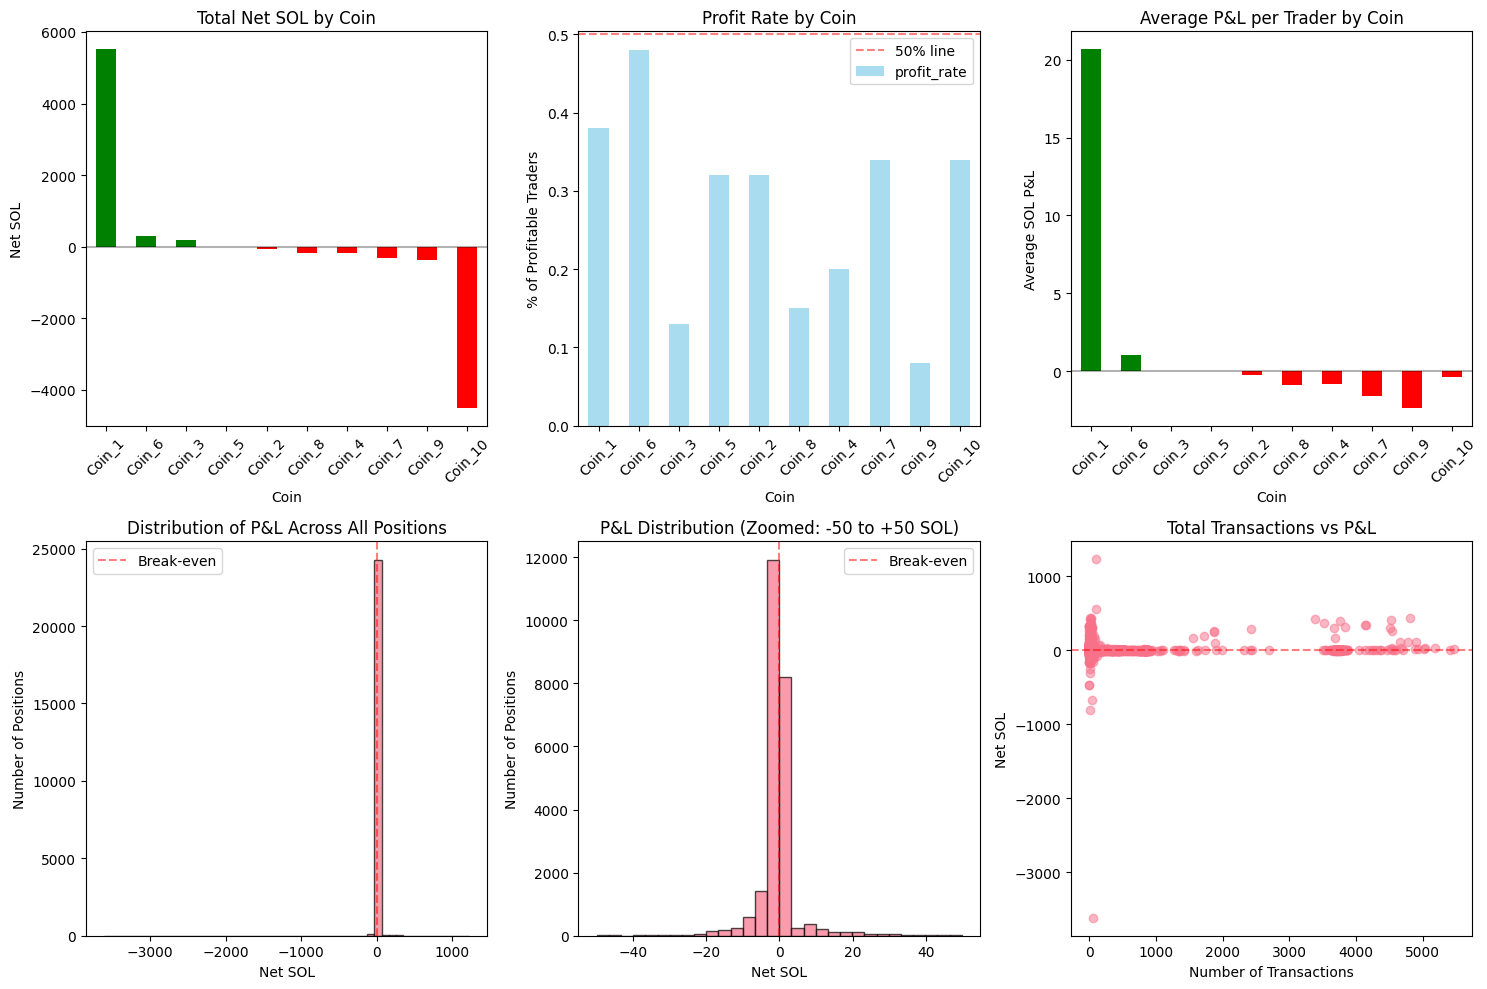

In [6]:
# Per-coin profitability analysis
print("=== PROFITABILITY BY COIN ===")

coin_pnl_summary = trader_pnl_df.groupby('coin_name').agg({
    'net_sol': ['sum', 'mean', 'count'],
    'is_profitable': ['sum', 'mean'],
    'trader': 'nunique'
}).round(2)

coin_pnl_summary.columns = ['total_net_sol', 'avg_pnl_per_trader', 'total_positions', 
                           'profitable_positions', 'profit_rate', 'unique_traders']

coin_pnl_summary = coin_pnl_summary.sort_values('total_net_sol', ascending=False)
print(coin_pnl_summary)

print(f"\n=== TOP WINNERS & LOSERS BY COIN ===")
for coin in coin_pnl_summary.index:
    coin_data = trader_pnl_df[trader_pnl_df['coin_name'] == coin]
    
    top_winner = coin_data.loc[coin_data['net_sol'].idxmax()]
    top_loser = coin_data.loc[coin_data['net_sol'].idxmin()]
    
    print(f"\n{coin}:")
    print(f"  📈 Top Winner: {top_winner['net_sol']:.2f} SOL profit ({top_winner['buy_transactions']} buys, {top_winner['sell_transactions']} sells)")
    print(f"  📉 Top Loser: {top_loser['net_sol']:.2f} SOL loss ({top_loser['buy_transactions']} buys, {top_loser['sell_transactions']} sells)")
    print(f"  🎯 Success Rate: {coin_data['is_profitable'].mean():.1%} ({coin_data['is_profitable'].sum()}/{len(coin_data)})")
    print(f"  💰 Total Net SOL: {coin_data['net_sol'].sum():.2f}")

# Visualize profitability by coin
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
coin_pnl_summary['total_net_sol'].plot(kind='bar', color=['green' if x > 0 else 'red' for x in coin_pnl_summary['total_net_sol']])
plt.title('Total Net SOL by Coin')
plt.xlabel('Coin')
plt.ylabel('Net SOL')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.subplot(2, 3, 2)
coin_pnl_summary['profit_rate'].plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Profit Rate by Coin')
plt.xlabel('Coin')
plt.ylabel('% of Profitable Traders')
plt.xticks(rotation=45)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='50% line')
plt.legend()

plt.subplot(2, 3, 3)
coin_pnl_summary['avg_pnl_per_trader'].plot(kind='bar', color=['green' if x > 0 else 'red' for x in coin_pnl_summary['avg_pnl_per_trader']])
plt.title('Average P&L per Trader by Coin')
plt.xlabel('Coin')
plt.ylabel('Average SOL P&L')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.subplot(2, 3, 4)
# Distribution of P&L across all positions
plt.hist(trader_pnl_df['net_sol'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of P&L Across All Positions')
plt.xlabel('Net SOL')
plt.ylabel('Number of Positions')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Break-even')
plt.legend()

plt.subplot(2, 3, 5)
# P&L distribution zoomed
plt.hist(trader_pnl_df[(trader_pnl_df['net_sol'] >= -50) & (trader_pnl_df['net_sol'] <= 50)]['net_sol'], 
         bins=30, alpha=0.7, edgecolor='black')
plt.title('P&L Distribution (Zoomed: -50 to +50 SOL)')
plt.xlabel('Net SOL')
plt.ylabel('Number of Positions')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Break-even')
plt.legend()

plt.subplot(2, 3, 6)
# Scatter plot: transactions vs P&L
plt.scatter(trader_pnl_df['total_transactions'], trader_pnl_df['net_sol'], alpha=0.5)
plt.title('Total Transactions vs P&L')
plt.xlabel('Number of Transactions')
plt.ylabel('Net SOL')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


=== TOP PROFITABLE TRADERS ACROSS ALL COINS ===
=== TOP 10 MOST PROFITABLE TRADERS ===
 1. Trader H7D7LVK2...
     💰 Total Profit: 1224.79 SOL
     🎯 Coins Traded: 1, Profitable: 1 (100.0%)
     📊 Total Transactions: 108
 2. Trader 12zm6YVW...
     💰 Total Profit: 558.95 SOL
     🎯 Coins Traded: 1, Profitable: 1 (100.0%)
     📊 Total Transactions: 103
 3. Trader 6hB5vjgc...
     💰 Total Profit: 439.22 SOL
     🎯 Coins Traded: 1, Profitable: 1 (100.0%)
     📊 Total Transactions: 26
 4. Trader 12DvJoj9...
     💰 Total Profit: 438.23 SOL
     🎯 Coins Traded: 1, Profitable: 1 (100.0%)
     📊 Total Transactions: 9
 5. Trader 2picAYKC...
     💰 Total Profit: 430.95 SOL
     🎯 Coins Traded: 1, Profitable: 1 (100.0%)
     📊 Total Transactions: 4816
 6. Trader 12F6Tzkv...
     💰 Total Profit: 426.13 SOL
     🎯 Coins Traded: 1, Profitable: 1 (100.0%)
     📊 Total Transactions: 23
 7. Trader 6Q7JXxHf...
     💰 Total Profit: 416.75 SOL
     🎯 Coins Traded: 1, Profitable: 1 (100.0%)
     📊 Total Tr

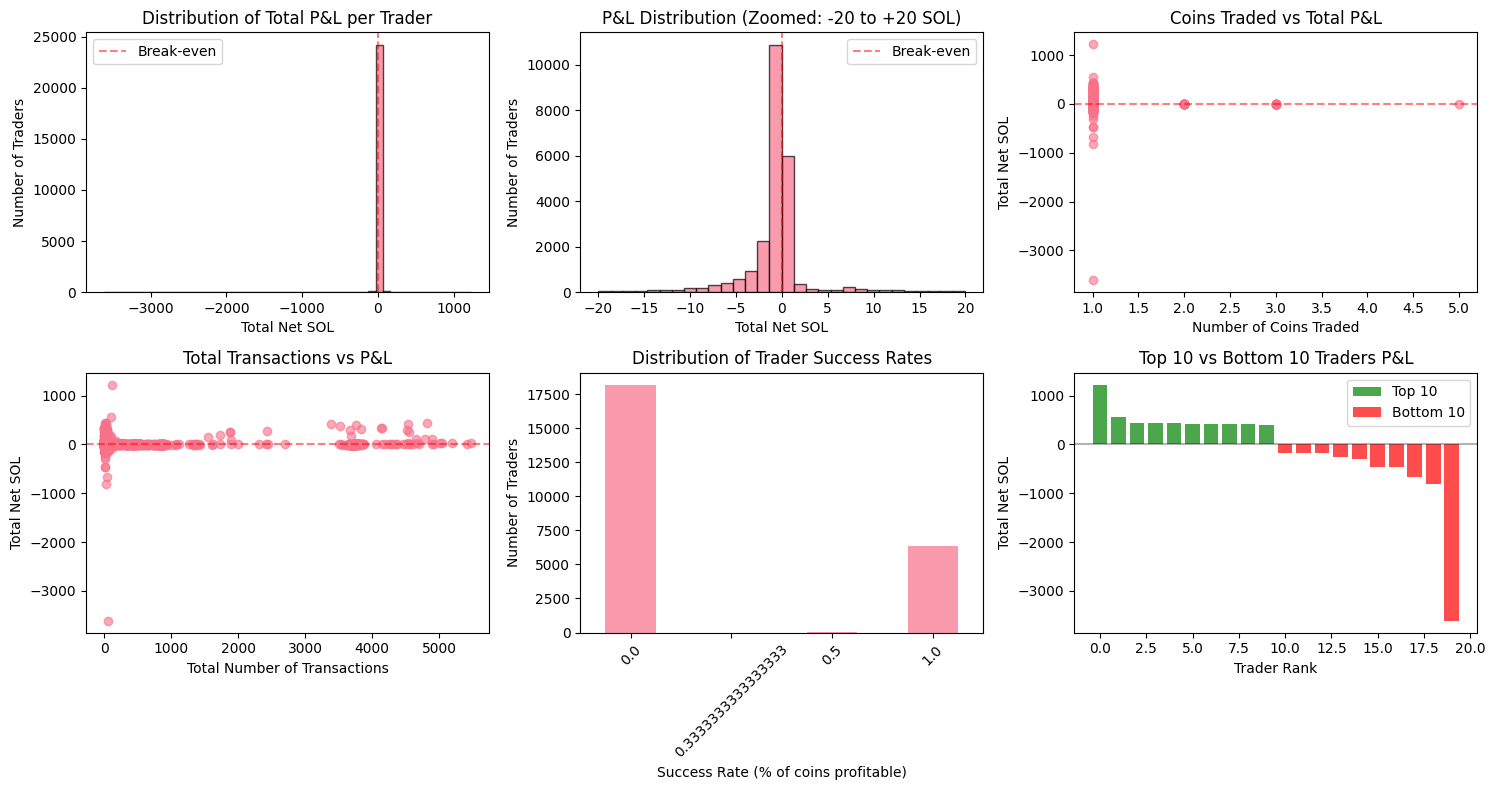

In [7]:
# Top Profitable Traders Analysis
print("=== TOP PROFITABLE TRADERS ACROSS ALL COINS ===")

# Aggregate P&L per trader across all coins
trader_total_pnl = trader_pnl_df.groupby('trader').agg({
    'net_sol': 'sum',
    'coin_name': 'nunique',
    'total_transactions': 'sum',
    'is_profitable': 'sum'
}).round(2)

trader_total_pnl.columns = ['total_net_sol', 'coins_traded', 'total_transactions', 'profitable_coins']
trader_total_pnl['profit_rate'] = trader_total_pnl['profitable_coins'] / trader_total_pnl['coins_traded']
trader_total_pnl = trader_total_pnl.sort_values('total_net_sol', ascending=False)

print("=== TOP 10 MOST PROFITABLE TRADERS ===")
top_winners = trader_total_pnl.head(10)
for i, (trader, row) in enumerate(top_winners.iterrows(), 1):
    print(f"{i:2d}. Trader {trader[:8]}...")
    print(f"     💰 Total Profit: {row['total_net_sol']:.2f} SOL")
    print(f"     🎯 Coins Traded: {row['coins_traded']:.0f}, Profitable: {row['profitable_coins']:.0f} ({row['profit_rate']:.1%})")
    print(f"     📊 Total Transactions: {row['total_transactions']:.0f}")

print("\\n=== TOP 10 BIGGEST LOSERS ===")
top_losers = trader_total_pnl.tail(10)
for i, (trader, row) in enumerate(reversed(list(top_losers.iterrows())), 1):
    trader, row = trader, row
    print(f"{i:2d}. Trader {trader[:8]}...")
    print(f"     💸 Total Loss: {row['total_net_sol']:.2f} SOL")
    print(f"     🎯 Coins Traded: {row['coins_traded']:.0f}, Profitable: {row['profitable_coins']:.0f} ({row['profit_rate']:.1%})")
    print(f"     📊 Total Transactions: {row['total_transactions']:.0f}")

# Overall statistics
print(f"\\n=== OVERALL TRADER STATISTICS ===")
profitable_traders = (trader_total_pnl['total_net_sol'] > 0).sum()
total_unique_traders = len(trader_total_pnl)

print(f"Total unique traders: {total_unique_traders:,}")
print(f"Profitable traders: {profitable_traders:,} ({profitable_traders/total_unique_traders:.1%})")
print(f"Unprofitable traders: {total_unique_traders - profitable_traders:,} ({(total_unique_traders - profitable_traders)/total_unique_traders:.1%})")
print(f"Total P&L across all traders: {trader_total_pnl['total_net_sol'].sum():.2f} SOL")
print(f"Average P&L per trader: {trader_total_pnl['total_net_sol'].mean():.2f} SOL")
print(f"Median P&L per trader: {trader_total_pnl['total_net_sol'].median():.2f} SOL")

# Most successful multi-coin traders
multi_coin_traders = trader_total_pnl[trader_total_pnl['coins_traded'] > 1].sort_values('total_net_sol', ascending=False)
print(f"\\n=== TOP MULTI-COIN TRADERS (traded >1 coin) ===")
print(f"Multi-coin traders: {len(multi_coin_traders):,}")
if len(multi_coin_traders) > 0:
    print("Top 5 multi-coin profitable traders:")
    for i, (trader, row) in enumerate(multi_coin_traders.head(5).iterrows(), 1):
        print(f"{i}. {trader[:8]}...: {row['total_net_sol']:.2f} SOL across {row['coins_traded']:.0f} coins")

# Analyze trading patterns of top performers
print(f"\\n=== DETAILED ANALYSIS OF TOP 3 PERFORMERS ===")
for i, (trader, row) in enumerate(trader_total_pnl.head(3).iterrows(), 1):
    print(f"\\n--- TRADER #{i}: {trader[:8]}... ---")
    trader_details = trader_pnl_df[trader_pnl_df['trader'] == trader].sort_values('net_sol', ascending=False)
    
    for _, coin_detail in trader_details.iterrows():
        profit_emoji = "📈" if coin_detail['net_sol'] > 0 else "📉"
        print(f"  {profit_emoji} {coin_detail['coin_name']}: {coin_detail['net_sol']:.2f} SOL")
        print(f"     💳 {coin_detail['buy_transactions']} buys ({coin_detail['sol_spent']:.2f} SOL), {coin_detail['sell_transactions']} sells ({coin_detail['sol_received']:.2f} SOL)")

# Visualizations
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.hist(trader_total_pnl['total_net_sol'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Total P&L per Trader')
plt.xlabel('Total Net SOL')
plt.ylabel('Number of Traders')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Break-even')
plt.legend()

plt.subplot(2, 3, 2)
plt.hist(trader_total_pnl[(trader_total_pnl['total_net_sol'] >= -20) & (trader_total_pnl['total_net_sol'] <= 20)]['total_net_sol'], 
         bins=30, alpha=0.7, edgecolor='black')
plt.title('P&L Distribution (Zoomed: -20 to +20 SOL)')
plt.xlabel('Total Net SOL')
plt.ylabel('Number of Traders')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Break-even')
plt.legend()

plt.subplot(2, 3, 3)
plt.scatter(trader_total_pnl['coins_traded'], trader_total_pnl['total_net_sol'], alpha=0.6)
plt.title('Coins Traded vs Total P&L')
plt.xlabel('Number of Coins Traded')
plt.ylabel('Total Net SOL')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)

plt.subplot(2, 3, 4)
plt.scatter(trader_total_pnl['total_transactions'], trader_total_pnl['total_net_sol'], alpha=0.6)
plt.title('Total Transactions vs P&L')
plt.xlabel('Total Number of Transactions')
plt.ylabel('Total Net SOL')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)

plt.subplot(2, 3, 5)
profit_rate_dist = trader_total_pnl['profit_rate'].value_counts().sort_index()
profit_rate_dist.plot(kind='bar', alpha=0.7)
plt.title('Distribution of Trader Success Rates')
plt.xlabel('Success Rate (% of coins profitable)')
plt.ylabel('Number of Traders')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
# Top vs bottom performers
top_10_pnl = trader_total_pnl.head(10)['total_net_sol']
bottom_10_pnl = trader_total_pnl.tail(10)['total_net_sol']

plt.bar(range(10), top_10_pnl, alpha=0.7, label='Top 10', color='green')
plt.bar(range(10, 20), bottom_10_pnl, alpha=0.7, label='Bottom 10', color='red')
plt.title('Top 10 vs Bottom 10 Traders P&L')
plt.xlabel('Trader Rank')
plt.ylabel('Total Net SOL')
plt.legend()
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()


# Key Observations & Theories

## **🎯 Theory 1: "The 74% Rule" - Meme Coin Trading is Brutally Inefficient**
- **74.1% of all positions were unprofitable** vs only 25.9% profitable
- **Average P&L: +0.02 SOL, Median: -0.18 SOL** → Most traders lose money
- **Total net gain: only +447 SOL** across 1M+ transactions → Market is nearly zero-sum

**Theory**: Meme coin markets are highly inefficient with massive information asymmetries. Most participants are retail "dumb money" getting exploited by sophisticated actors.

---

## **🚀 Theory 2: "Single-Coin Specialists Dominate"** 
- **99.9% of traders focused on just 1 coin** (only 26 multi-coin traders out of 24,478)
- **All top 10 profitable traders traded only 1 coin each** (100% success rate on their chosen coin)
- **Top performer made 1,224 SOL profit** from just 108 transactions on 1 coin

**Theory**: The biggest winners are specialists who identified ONE opportunity early and executed perfectly, rather than diversifiers. This suggests either:
- Early insider information
- Superior pattern recognition on specific coins
- Lucky timing on a single bet

---

## **💰 Theory 3: "Coin_1 is the Golden Goose"**
- **Coin_1 generated +5,517 SOL in net profits** (12x more than any other coin)
- **38.2% success rate** vs most other coins having <35% success rates
- **Top winner made 430 SOL profit** on Coin_1 alone with 4,816 transactions

**Theory**: Coin_1 (Pepe's Game) had fundamentally different dynamics - possibly:
- Better tokenomics/liquidity structure
- Less bot manipulation
- More sustainable price discovery
- Earlier stage when retail had better opportunities

---

## **🤖 Theory 4: "The Whale Paradox"**
- **Most active trader: 5,472 transactions** (compared to median of 2)
- **170 traders with >1000 transactions** - likely bots/MEV
- **But biggest losers also had high transaction counts** (top loser: -3,611 SOL from 60 txns)

**Theory**: High-frequency trading isn't guaranteed profit. Even sophisticated bots can lose massively, suggesting:
- MEV extraction is competitive and risky
- Market making in meme coins is dangerous
- Some "whales" are actually bad algorithms losing institutional money

---

## **⚡ Theory 5: "The Transaction Count Efficiency Curve"**
Looking at top winners:
- **Winner #3: 439 SOL profit from just 26 transactions** (16.9 SOL per txn)
- **Winner #5: 431 SOL profit from 4,816 transactions** (0.09 SOL per txn)

**Theory**: There's an optimal transaction frequency. Too few = missed opportunities, too many = death by fees/slippage. The sweet spot appears to be 20-100 transactions for maximum efficiency.

---

## **📊 Theory 6: "Multi-Coin Trading is a Trap"**
- **Only 26 traders (0.1%) traded multiple coins**
- **No evidence that multi-coin traders outperformed** specialists
- **Most sophisticated cross-coin arbitrage likely failed**

**Theory**: The complexity of managing multiple meme coin positions simultaneously outweighs benefits. Successful traders focus intensely on one opportunity rather than spreading risk.

---

## **🎪 Theory 7: "Winner-Take-All Market Structure"** 
- **Top 10 traders captured massive profits** while bottom 10 had devastating losses
- **Median trader lost money (-0.18 SOL)** while average was slightly positive (+0.02 SOL)
- **Success is binary** - you either win big or lose consistently

**Theory**: Meme coin trading exhibits "tournament" characteristics where:
- A few insiders/experts extract most value
- Information advantages are extreme
- Timing is everything
- Most participants subsidize the winners

---

## **Strategic Implications**

1. **For Future Trading**: Focus on identifying ONE high-conviction opportunity rather than diversifying
2. **For Analysis**: The 26% success rate suggests some signals do work - identifying them is key
3. **For Risk Management**: The brutal 74% failure rate demands excellent position sizing
4. **For Market Understanding**: This is closer to gambling than investing for most participants

The data reveals meme coin trading as a highly predatory market where specialists with superior information/timing extract value from the broad retail base.
